In [88]:
from collections import deque
from numpy import inf
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [86]:
def shortest_path(G, source):
    """
    This function computes the shortest path from a source node using Dijkstra's algorithm
    
    Input:
    - G a graph
    - source: a node in the graph

    Output:
    - distances = dictionary of nodes already visited, key node and value the number of hops to 
        get there from the source

    """
    # initiate all the distances to inf except for the source node that has distance 0 from itself
    distances = {}
    for node in list(G.nodes):
            distances[node] = inf
    distances[source] = 0
    
    # create FIFO queue of nodes to visit and enqueue the source node toghether with its distance
    to_visit = deque([])
    to_visit.append((source, 0))

    #while there is something to visit in the queue
    while len(to_visit) > 0:
        #remove the first element from the queue and visit it 
        node = to_visit.popleft()
        # for each neighbour of the current node...
        for neighbor in G.neighbors(node[0]):
            # 
            if (distances[neighbor] > node[1]+ 1):
                to_visit.append((neighbor, node[1] + 1 ))
                distances[neighbor] = node[1]+ 1
                    
    #we are done visiting everything so we can return the distances dictionary
    return (distances)

shortest_path(G, 0)

{0: 0, 1: 1, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 1, 9: 1}

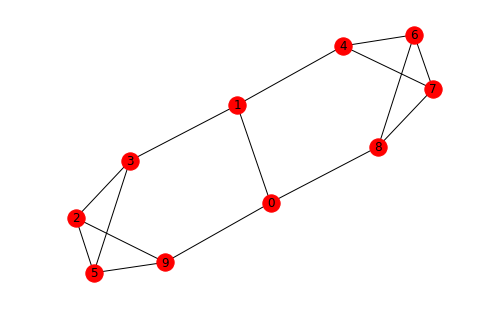

In [84]:
G = nx.random_regular_graph(d=3, n=10)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
#node_labels = nx.get_node_attributes(G,'Distance')
#nx.draw_networkx_labels(G,pos, labels = node_labels)
plt.show() 

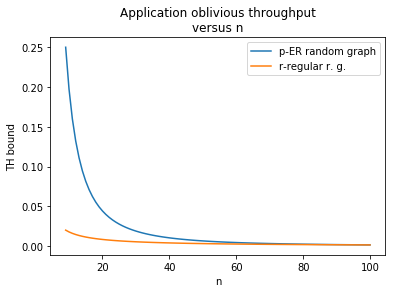

In [109]:
def hbar(G):
    """
    This function computes the mean of the lengths 
    of the shortest paths connecting all node pairs.
    
    The function performs Dijkstra's algorithm starting from 
    each node; every time it appends the length of the
    shortest paths from the source in a list.
    
    The last step is take the average of the elements 
    in the list
    
    Input:
    - G: a graph
    
    Output:
    -hbar: mean of the lengths of the shortest paths 
    connecting all node pairs
    """
    distances = []
    for i in list(G.nodes):
        distances.append(list(shortest_path(G, i)))
    hbar = np.mean(np.array(distances))
    return (hbar)
    

TH = []
for n in range(9,101): 
    p = 8/(n-1)
    # create a G_n,p random graph
    Gnp = nx.gnp_random_graph(n=n, p=p)
    TH.append(p/hbar(Gnp))

x = np.array(list(range(9,101)))
y = np.array(TH)
plt.plot(x, y,label = 'p-ER random graph')

TH = []
for n in range(9,101): 
    r = 8
    # create a G_n,r regular random graph
    rrG = nx.random_regular_graph(d=r, n=n)
    TH.append(r/(hbar(Gnp)*(n-1)))

x = np.array(list(range(9,101)))
y = np.array(TH)
plt.plot(x, y,label = 'r-regular r. g.')

plt.title("Application oblivious throughput\nversus n")
plt.ylabel("TH bound")
plt.xlabel("n")
plt.legend(loc = "upper right")
plt.show()
return